<a href="https://colab.research.google.com/github/Airdef/BeatData_Test/blob/main/LLamaindex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install lib

In [ ]:
!pip install -q llama-index
!pip install openai
#!pip install PyPDF2
#!pip install transformers
!pip install llama-cpp-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 16.8 MB/s eta 0:00:00
  Installing build dependencie

Import lib

In [ ]:
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex, Settings #Load data and store embeddings
from llama_index.llms.openai import OpenAI #chatgpt as llm
from llama_index.embeddings.openai import OpenAIEmbedding #embedding generation
from llama_index.core.node_parser import SentenceSplitter #break text into sentences

import time #wait between inputs
import os
from IPython.display import clear_output #clear console
from getpass import getpass #secure password input
import openai #API KEY validation

#from PyPDF2 import PdfReader
#from IPython.display import Markdown, display #Display output

Import Openai key and create directory for pdfs if not exists

In [ ]:

dir="/content/KW_space"
os.environ['OPENAI_API_KEY']=""

while  True:
  os.environ['OPENAI_API_KEY']=getpass("Please write OPENAI API KEY: ")
  clear_output(wait=True)
  client = openai.OpenAI(api_key=os.environ['OPENAI_API_KEY'])
  try:
      client.models.list()
      print( "API Key is valid!")
      break

  except :
      print( "Authentication failed: The API Key is invalid.")


print("Key saved")

if not os.path.exists(dir):
    try:
      !mkdir KW_space
      print(f"directory: {dir} created")
    except:
      print(f"Fatal Error")
      exit(0)
else:
    print(f"Directory {dir} exists.")


API Key is valid!
Key saved
Directory /content/KW_space exists.


Refresh button:


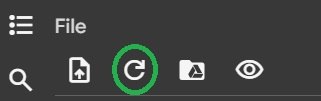

Sometiimes the directory exists while not displayed, there is no command to execute the refresh automatically

In [ ]:
print("please refresh files index (second icon on the left)\n")
time.sleep(1)

print("Directory is empty\n")
print("please Load PDF into dir called: KW_space\n")
print("If you can not see the directory please refresh the index\n")

while not os.listdir("/content/KW_space"):
    time.sleep(0.5) #check every .5 sec

clear_output()
print("File Loaded\n")

File Loaded



Read PDF from directory

In [ ]:
try:
  doc=SimpleDirectoryReader(dir).load_data()
  print("files imported correctly")
except:
  print("error file not imported, control files")


files imported correctly


Setup model and chunks sizes



In [ ]:
Settings.llm = OpenAI(model="gpt-3.5-turbo")
Settings.embed_model = OpenAIEmbedding(model="text-embedding-3-small")
Settings.node_parser = SentenceSplitter(chunk_size=512, chunk_overlap=20)
Settings.num_output = 512
Settings.context_window = 3900

In [ ]:
index= VectorStoreIndex.from_documents(doc)
del doc
# index.storage_context.persist()    #in case you want to save embeddings into a folder

Q/A

In [ ]:
query_engine=index.as_query_engine()


SOLUTION 1

In [ ]:
count=0
while True:

  Q=input("what is you question based on the pdf? (0 to exit):\n ")
  if Q == "0":
    count=0
    break

  try:
    print("\n",query_engine.query(Q),"\n\n")
    if count >0:
      count=0

  except:
    count+=1
    print("Problem occurred, please try again")
    if count >=5:
      clear_output()
      exit(0)



what is you question based on the pdf? (0 to exit):
 0
